# Predicting Multiple Sclerosis from Dynamics of Gait Variability - A Deep Learning Approach
### Ablation Study using the Traditional ML algorithms on task generalization framework namely W-> WT to classify HOA/MS sequences of strides and subjects 
We are doing Ablation Study only on **regress-N data** for the task generalization framework using the Traditional ML algorithms only.

In [37]:
from importlib import reload
import utils.utils_traditional_methods
reload(utils.utils_traditional_methods)
from utils.utils_traditional_methods import normalize, extract_features_labels_task_generalize, models_task_generalize
from utils.utils_traditional_methods import plotROC_task_generalize
from utils.package_imports import *
import xgboost

In [38]:
results_dir = 'ablation_results_5strides\\'

#Regress-N data
print ('\nregress-N data')
trainX_regressN, trainY_regressN, testX_regressN, testY_regressN = extract_features_labels_task_generalize("data/summary_statistics_regressN_data_5strides.csv")
data_type = 'regressN_data'


regress-N data
TrainX shape:  (736, 42)


,ButterflySQ_x_mean,Butterfly_x_abs_mean,DS_L_mean,DS_R_mean,LeftFPA_mean,RightFPA_mean,SS_R_mean,cadence_mean,force_HSL_mean,force_HSR_mean,...,force_MidSSR_std,force_TOL_std,force_TOR_std,stance_time_std,stride_length_std,stride_speed_std,stride_time_std,stride_width_std,swing_time_std,walk_ratio_std
196,-0.409745,-0.432082,-0.132046,-0.340386,-0.332359,-0.559085,0.062445,0.011957,-0.333941,-0.324277,...,-0.701017,0.390792,0.618130,0.334480,2.343325,0.990954,0.590135,-0.420891,1.019587,1.663325
187,-0.472719,-1.002075,0.137427,0.129023,-0.031781,0.112256,-0.055618,-0.249611,-0.277714,-0.354161,...,-0.722670,-0.963869,-0.326772,-0.415837,-0.902093,-0.940853,-0.664603,-1.076646,-0.731608,-0.676925
14,0.073585,0.425948,0.004601,0.366356,0.327055,0.081935,-0.186795,-0.593504,-0.535383,-0.449698,...,-0.536310,0.283899,-0.627870,-0.332540,-0.592253,-0.596728,0.055223,-0.370501,0.013407,-0.163246
31,-0.628554,-1.013670,1.064168,1.675296,0.283728,0.125955,0.579387,-1.567204,-0.171719,-0.261191,...,-1.081691,-1.152891,-0.951107,-0.036860,-0.692807,-0.687715,-0.030973,-0.805613,-0.444585,-0.463890
391,-0.574828,-0.628862,-0.534856,-0.680002,-1.153678,-0.054562,-0.472959,0.745540,-0.163156,-0.287680,...,-0.142123,0.603455,-0.002274,-0.617571,-0.057634,-0.218948,-0.621583,0.154160,-1.067807,-0.226395


TrainY shape:  (736, 2)
TestX shape:  (700, 42)


,ButterflySQ_x_mean,Butterfly_x_abs_mean,DS_L_mean,DS_R_mean,LeftFPA_mean,RightFPA_mean,SS_R_mean,cadence_mean,force_HSL_mean,force_HSR_mean,...,force_MidSSR_std,force_TOL_std,force_TOR_std,stance_time_std,stride_length_std,stride_speed_std,stride_time_std,stride_width_std,swing_time_std,walk_ratio_std
1042,-0.528283,-0.152177,-0.235146,-0.479504,-0.097303,0.127362,-1.566115,1.091953,0.070948,-0.021972,...,-0.981324,-0.791191,-0.615194,-0.786777,-0.983063,-1.114395,-0.659646,-0.377265,-0.878453,-0.671901
1340,-0.544415,-0.545377,-0.691559,-0.655411,0.216967,0.022787,0.893245,-0.082557,-0.235888,-0.251465,...,-0.334935,0.728618,-0.253324,-0.745117,-1.026155,-0.579701,-0.419988,1.491688,-0.488734,-0.523672
776,-0.531946,-0.282888,1.707103,1.691849,0.075682,-0.830206,1.539422,-2.141990,0.008976,-0.014914,...,-0.367130,0.366267,-1.123500,-0.199932,-0.497071,-0.840516,0.552156,-0.165577,1.658898,0.335252
1229,-0.570077,-0.727726,-1.014137,-1.010914,0.878865,0.191041,-0.751362,1.739034,-0.204506,0.057334,...,0.635447,2.222398,3.304714,-0.524356,-0.633839,-0.520237,-0.473960,1.626295,0.239433,-0.293286
750,-0.359424,-0.276327,-0.214077,-0.336304,0.278236,0.010903,-0.029866,0.127607,-0.436243,-0.481742,...,-0.937409,-0.361765,-1.135183,-0.559943,-0.555407,-0.525620,-0.416440,0.140025,-0.503531,-0.451602


TestY shape:  (700, 2)


In [39]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'knn', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']

spatial = ['stride_length', 'stride_width', 'LeftFPA', 'RightFPA']
temporal = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_L', 'DS_R', 'cadence' ]
spatiotemporal = ['stride_speed', 'walk_ratio']
kinetic = ['force_HSR', 'force_MidSSR', 'force_TOR', 'force_HSL', 'force_TOL', 'force_MidSSL', 'Butterfly_x_abs', 'ButterflySQ_x']

spatial_features = [s for s in trainX_regressN.columns if any(x in s for x in spatial)]
print ('Spatial features: ', spatial_features, '\nNumber of spatial features = ', len(spatial_features))

temporal_features = [s for s in trainX_regressN.columns if any(x in s for x in temporal)]
print ('\nTemporal features: ', temporal_features, '\nNumber of temporal features = ', len(temporal_features))

spatiotemporal_features = [s for s in trainX_regressN.columns if any(x in s for x in spatiotemporal)]
print ('\nSpatiotemporal features: ', spatiotemporal_features, '\nNumber of spatiotemporal features = ', len(spatiotemporal_features))

kinetic_features = [s for s in trainX_regressN.columns if any(x in s for x in kinetic)]
print ('\nKinetic features: ', kinetic_features, '\nNumber of kinetic_features = ', len(kinetic_features))

datastreams = {'spatial': spatial_features, 'temporal': temporal_features, 'kinetic': kinetic_features, 
        'spatiotemporal': spatial_features+temporal_features+spatiotemporal_features, 'spatial_kinetic': spatial_features+kinetic_features,\
       'temporal_kinetic':  temporal_features+kinetic_features}

ablation_columns = list(itertools.product(ml_models,datastreams))
regressN_metrics = pd.DataFrame(columns = ablation_columns) #Dataframe to store accuracies for each ML model for raw data 

Spatial features:  ['LeftFPA_mean', 'RightFPA_mean', 'stride_length_mean', 'stride_width_mean', 'LeftFPA_std', 'RightFPA_std', 'stride_length_std', 'stride_width_std'] 
Number of spatial features =  8

Temporal features:  ['DS_L_mean', 'DS_R_mean', 'SS_R_mean', 'cadence_mean', 'stance_time_mean', 'stride_time_mean', 'swing_time_mean', 'DS_L_std', 'DS_R_std', 'SS_R_std', 'cadence_std', 'stance_time_std', 'stride_time_std', 'swing_time_std'] 
Number of temporal features =  14

Spatiotemporal features:  ['stride_speed_mean', 'walk_ratio_mean', 'stride_speed_std', 'walk_ratio_std'] 
Number of spatiotemporal features =  4

Kinetic features:  ['ButterflySQ_x_mean', 'Butterfly_x_abs_mean', 'force_HSL_mean', 'force_HSR_mean', 'force_MidSSL_mean', 'force_MidSSR_mean', 'force_TOL_mean', 'force_TOR_mean', 'ButterflySQ_x_std', 'Butterfly_x_abs_std', 'force_HSL_std', 'force_HSR_std', 'force_MidSSL_std', 'force_MidSSR_std', 'force_TOL_std', 'force_TOR_std'] 
Number of kinetic_features =  16


('random_forest', 'spatial')
Stride-based model performance:  0.63 0.5636363636363636 0.6179401993355482 0.5895404120443739 0.6905719448121967
RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=0.1, n_estimators=45, random_state=0)
Person-based model performance:  0.5714285714285714 0.5625 0.5294117647058824 0.5454545454545455 0.6519607843137254


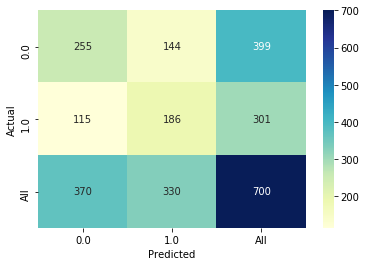

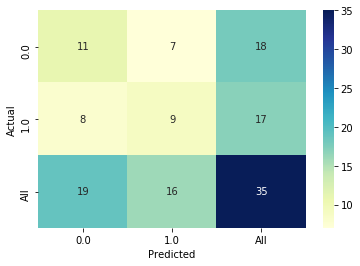

********************************
('random_forest', 'temporal')
Stride-based model performance:  0.6742857142857143 0.6188925081433225 0.6312292358803987 0.625 0.7236654759823147
RandomForestClassifier(max_depth=20, n_estimators=40, random_state=0)
Person-based model performance:  0.8 0.8125 0.7647058823529411 0.787878787878788 0.8856209150326797


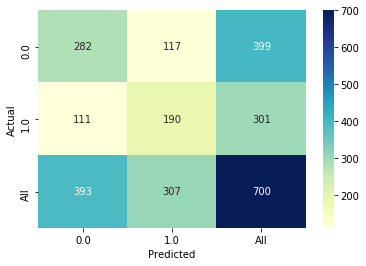

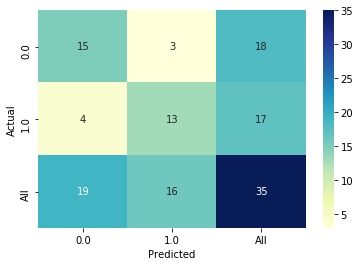

********************************
('random_forest', 'kinetic')
Stride-based model performance:  0.69 0.6544117647058824 0.5913621262458472 0.6212914485165794 0.7874711696183981
RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=0.1, n_estimators=40, random_state=0)
Person-based model performance:  0.7714285714285715 0.8461538461538461 0.6470588235294118 0.7333333333333334 0.8169934640522875


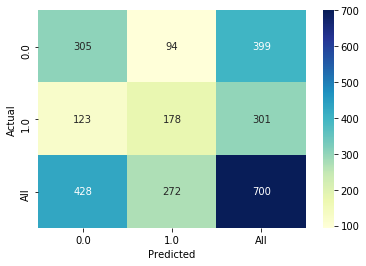

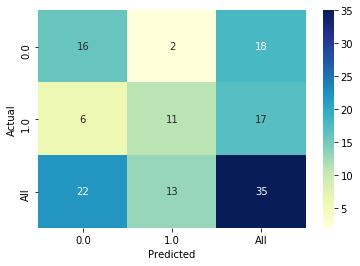

********************************
('random_forest', 'spatiotemporal')
Stride-based model performance:  0.6342857142857142 0.5714285714285714 0.5980066445182725 0.5844155844155844 0.686279652619922
RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=None,
                       min_samples_leaf=0.1, n_estimators=40, random_state=0)
Person-based model performance:  0.6571428571428571 0.6470588235294118 0.6470588235294118 0.6470588235294118 0.704248366013072


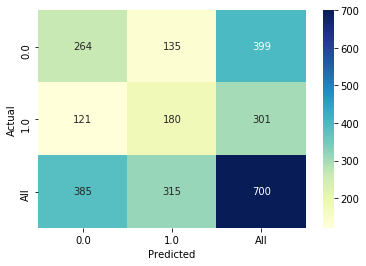

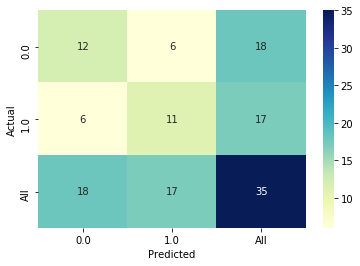

********************************
('random_forest', 'spatial_kinetic')
Stride-based model performance:  0.7328571428571429 0.6862745098039216 0.6976744186046512 0.6919275123558484 0.8013139160192841
RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=0.1, n_estimators=40, random_state=0)
Person-based model performance:  0.8 0.8571428571428571 0.7058823529411765 0.7741935483870968 0.8316993464052287


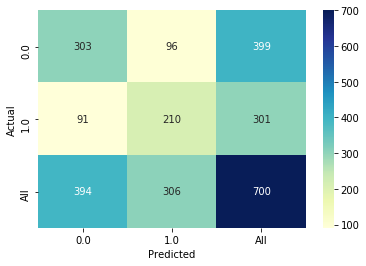

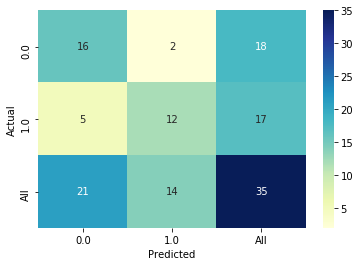

********************************
('random_forest', 'temporal_kinetic')
Stride-based model performance:  0.7671428571428571 0.7555555555555555 0.6777408637873754 0.7145359019264449 0.8671804094954996
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=0)
Person-based model performance:  0.8857142857142857 0.9333333333333333 0.8235294117647058 0.8749999999999999 0.946078431372549


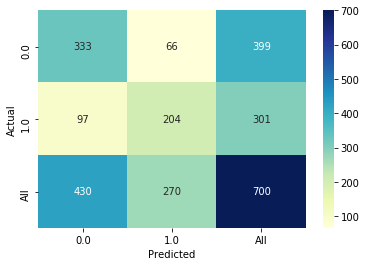

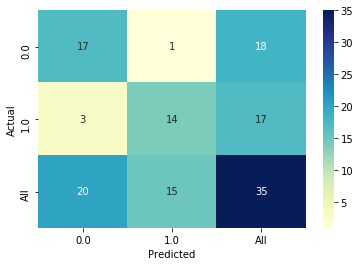

********************************
('adaboost', 'spatial')
Stride-based model performance:  0.6942857142857143 0.6899563318777293 0.5249169435215947 0.5962264150943396 0.7246146928783752
AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=0)
Person-based model performance:  0.6571428571428571 0.7777777777777778 0.4117647058823529 0.5384615384615384 0.7630718954248366


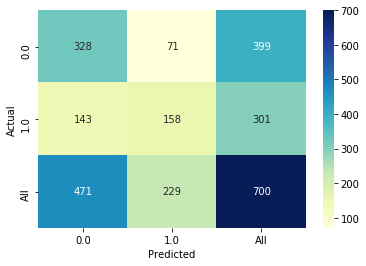

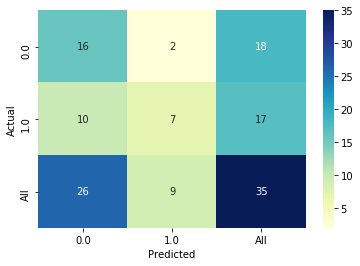

********************************
('adaboost', 'temporal')
Stride-based model performance:  0.6414285714285715 0.631578947368421 0.39867109634551495 0.4887983706720978 0.645892138985337
AdaBoostClassifier(learning_rate=0.1, random_state=0)
Person-based model performance:  0.7428571428571429 0.9 0.5294117647058824 0.6666666666666667 0.7140522875816995


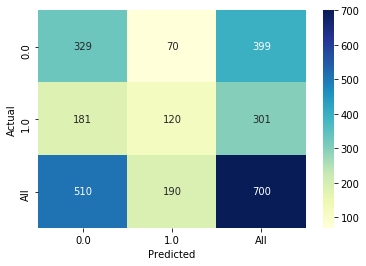

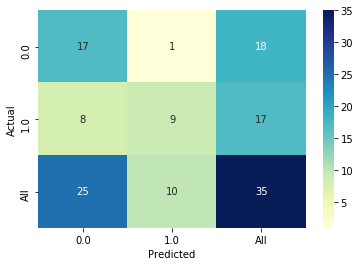

********************************
('adaboost', 'kinetic')
Stride-based model performance:  0.6742857142857143 0.631768953068592 0.5813953488372093 0.6055363321799309 0.7147519962697442
AdaBoostClassifier(learning_rate=1.5, n_estimators=150, random_state=0)
Person-based model performance:  0.6857142857142857 0.8 0.47058823529411764 0.5925925925925927 0.857843137254902


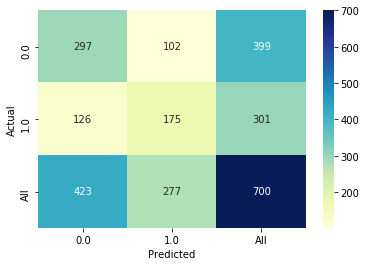

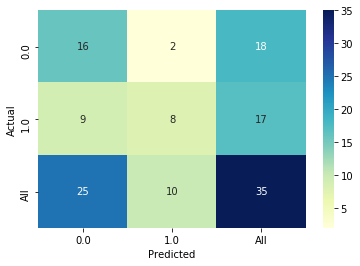

********************************
('adaboost', 'spatiotemporal')
Stride-based model performance:  0.42142857142857143 0.35714285714285715 0.4318936877076412 0.3909774436090226 0.4366147927959434
AdaBoostClassifier(learning_rate=2, n_estimators=150, random_state=0)
Person-based model performance:  0.4 0.3888888888888889 0.4117647058823529 0.39999999999999997 0.4019607843137255


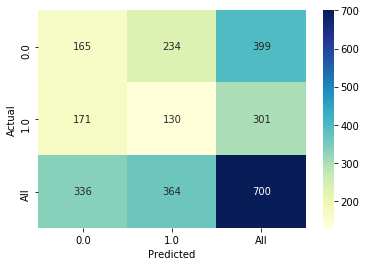

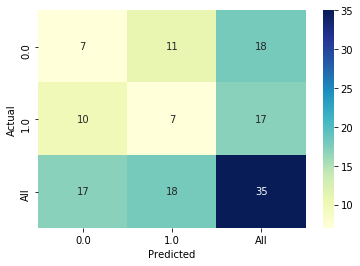

********************************
('adaboost', 'spatial_kinetic')
Stride-based model performance:  0.7271428571428571 0.8160919540229885 0.4717607973421927 0.5978947368421053 0.7895319694585301
AdaBoostClassifier(learning_rate=0.1, n_estimators=75, random_state=0)
Person-based model performance:  0.6857142857142857 0.875 0.4117647058823529 0.56 0.8480392156862744


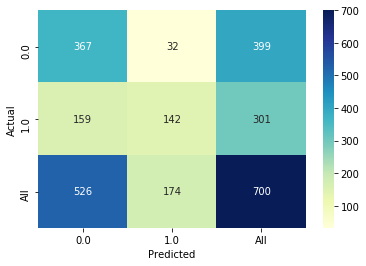

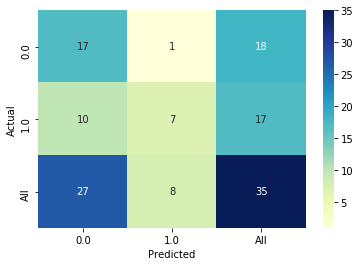

********************************
('adaboost', 'temporal_kinetic')
Stride-based model performance:  0.6742857142857143 0.6377358490566037 0.5614617940199336 0.5971731448763251 0.7143689789257197
AdaBoostClassifier(learning_rate=1.5, n_estimators=75, random_state=0)
Person-based model performance:  0.7142857142857143 0.8888888888888888 0.47058823529411764 0.6153846153846153 0.8545751633986928


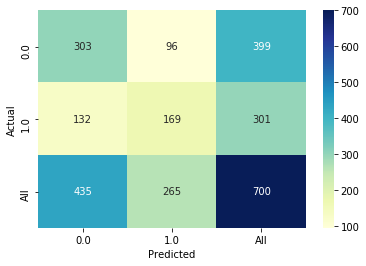

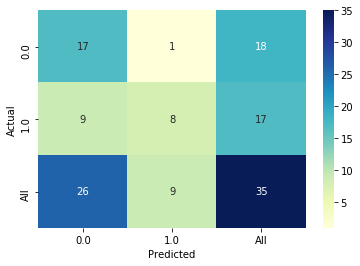

********************************
('kernel_svm', 'spatial')
Stride-based model performance:  0.6257142857142857 0.9534883720930233 0.1362126245847176 0.23837209302325582 0.6552427580579356
SVC(gamma=0.001, probability=True, random_state=0)
Person-based model performance:  0.5714285714285714 1.0 0.11764705882352941 0.21052631578947367 0.6552287581699348


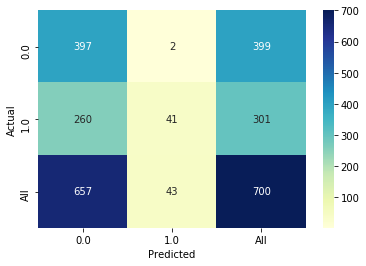

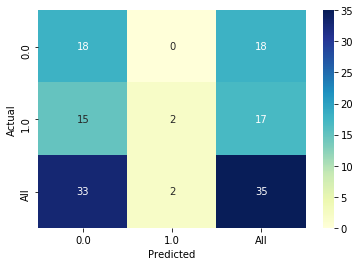

********************************
('kernel_svm', 'temporal')
Stride-based model performance:  0.5928571428571429 0.8636363636363636 0.06312292358803986 0.11764705882352941 0.4366480986519454
SVC(gamma=0.001, probability=True, random_state=0)
Person-based model performance:  0.6285714285714286 1.0 0.23529411764705882 0.38095238095238093 0.6078431372549019


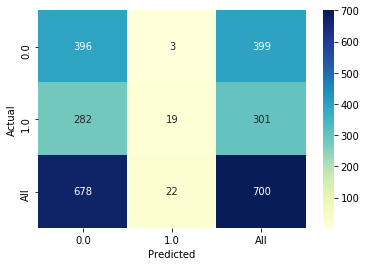

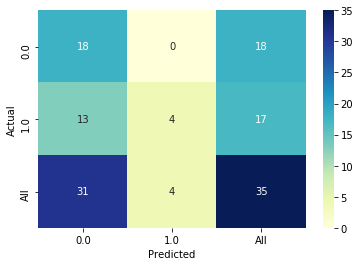

********************************
('kernel_svm', 'kinetic')
Stride-based model performance:  0.57 0.0 0.0 0.0 0.6078859940549047
SVC(gamma=0.0001, probability=True, random_state=0)
Person-based model performance:  0.5142857142857142 0.0 0.0 0.0 0.5


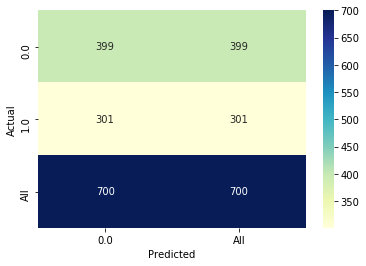

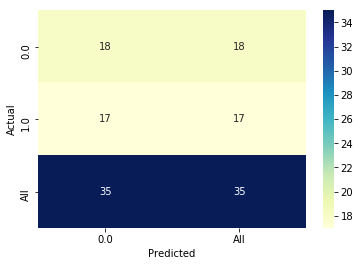

********************************
('kernel_svm', 'spatiotemporal')
Stride-based model performance:  0.57 0.0 0.0 0.0 0.5523526424033506
SVC(gamma=0.0001, probability=True, random_state=0)
Person-based model performance:  0.5142857142857142 0.0 0.0 0.0 0.5


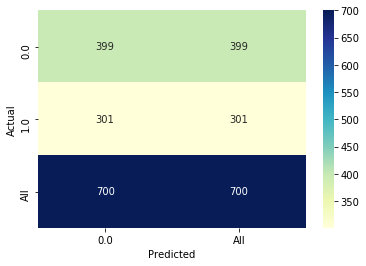

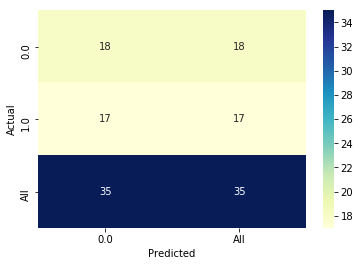

********************************
('kernel_svm', 'spatial_kinetic')
Stride-based model performance:  0.7871428571428571 0.7676056338028169 0.7242524916943521 0.7452991452991453 0.8596074904870149
SVC(gamma=0.1, probability=True, random_state=0)
Person-based model performance:  0.8571428571428571 0.9285714285714286 0.7647058823529411 0.8387096774193549 0.9248366013071895


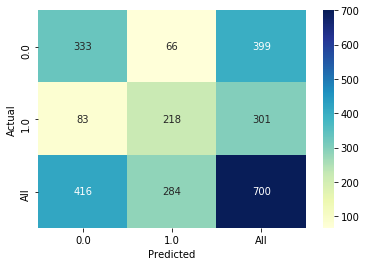

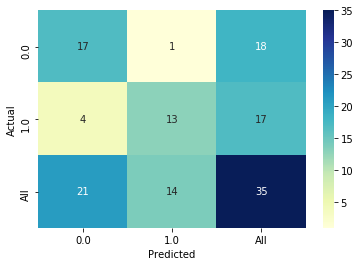

********************************
('kernel_svm', 'temporal_kinetic')
Stride-based model performance:  0.6214285714285714 0.8214285714285714 0.15282392026578073 0.25770308123249297 0.5894720189177262
SVC(gamma=0.001, probability=True, random_state=0)
Person-based model performance:  0.6571428571428571 1.0 0.29411764705882354 0.45454545454545453 0.6633986928104576


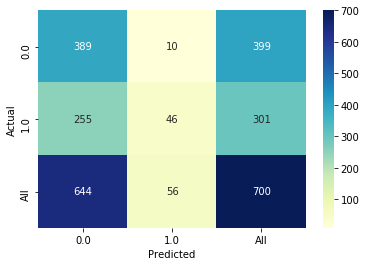

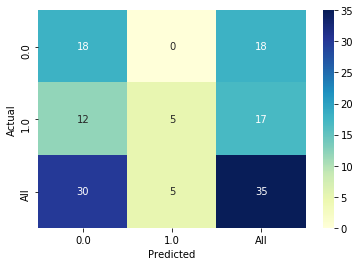

********************************
('gbm', 'spatial')
Stride-based model performance:  0.6442857142857142 0.6397849462365591 0.3953488372093023 0.48870636550308005 0.7420544717274914
GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=5,
                           min_samples_leaf=3, n_estimators=50, random_state=0)
Person-based model performance:  0.6 0.7142857142857143 0.29411764705882354 0.4166666666666667 0.6928104575163399


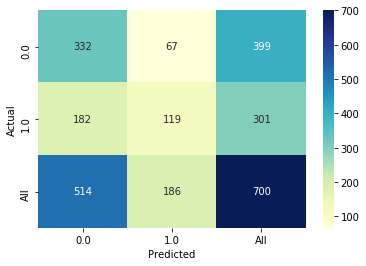

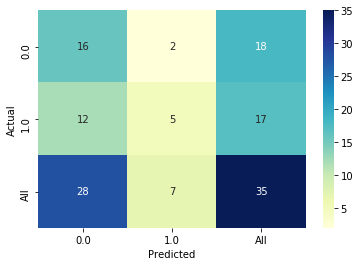

********************************
('gbm', 'temporal')
Stride-based model performance:  0.6328571428571429 0.6375 0.3388704318936877 0.44251626898047725 0.6406797725210035
GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=5,
                           n_estimators=50, random_state=0)
Person-based model performance:  0.7142857142857143 1.0 0.4117647058823529 0.5833333333333334 0.6879084967320261


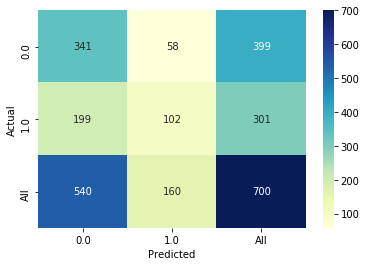

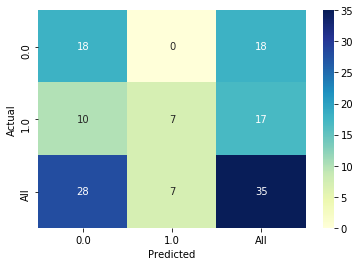

********************************
('gbm', 'kinetic')
Stride-based model performance:  0.7085714285714285 0.702928870292887 0.5581395348837209 0.6222222222222222 0.7846859674102199
GradientBoostingClassifier(learning_rate=0.15, max_depth=2, max_features=6,
                           min_samples_split=4, n_estimators=150,
                           random_state=0)
Person-based model performance:  0.7142857142857143 0.8181818181818182 0.5294117647058824 0.6428571428571428 0.880718954248366


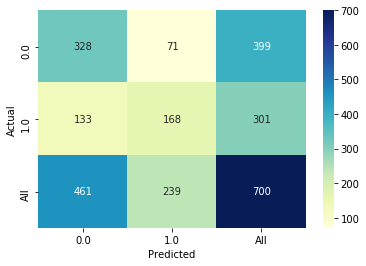

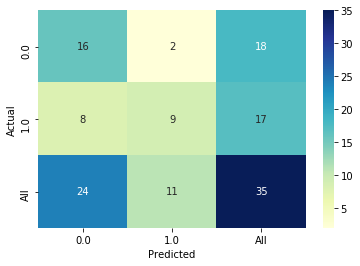

********************************
('gbm', 'spatiotemporal')
Stride-based model performance:  0.7557142857142857 0.751937984496124 0.6445182724252492 0.6940966010733453 0.8190409578764186
GradientBoostingClassifier(learning_rate=0.15, max_depth=2, max_features=4,
                           random_state=0)
Person-based model performance:  0.8 0.9166666666666666 0.6470588235294118 0.7586206896551724 0.8513071895424837


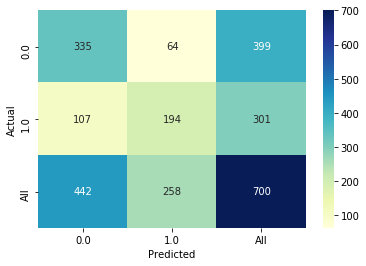

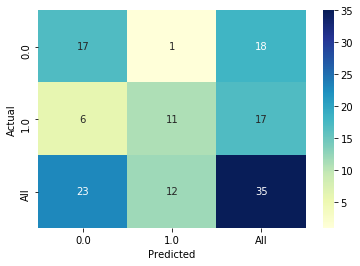

********************************
('gbm', 'spatial_kinetic')
Stride-based model performance:  0.7714285714285715 0.8190045248868778 0.6013289036544851 0.6934865900383143 0.8430877859099576
GradientBoostingClassifier(max_depth=2, max_features=6, min_samples_leaf=3,
                           random_state=0)
Person-based model performance:  0.7428571428571429 0.9 0.5294117647058824 0.6666666666666667 0.9248366013071896


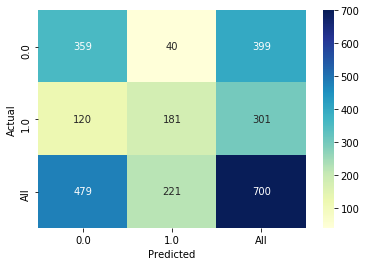

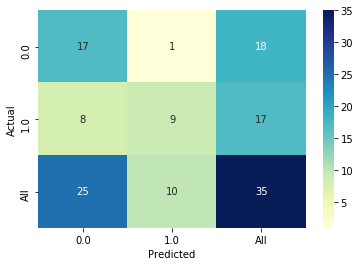

********************************
('gbm', 'temporal_kinetic')
Stride-based model performance:  0.7557142857142857 0.7338129496402878 0.6777408637873754 0.7046632124352332 0.8621553884711779
GradientBoostingClassifier(max_depth=7, max_features=6, n_estimators=150,
                           random_state=0)
Person-based model performance:  0.8285714285714286 1.0 0.6470588235294118 0.7857142857142858 0.9199346405228758


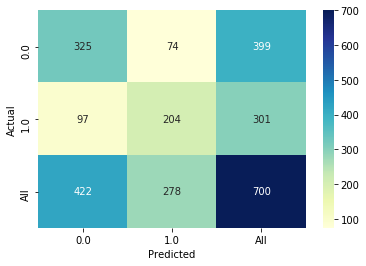

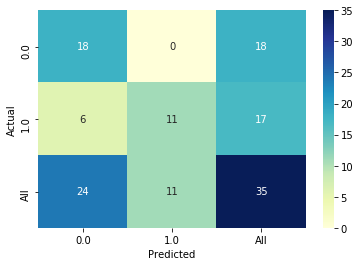

********************************
('xgboost', 'spatial')
Stride-based model performance:  0.7342857142857143 0.7153558052434457 0.6345514950166113 0.6725352112676056 0.8058768182915761
XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=7, subsample=1.0)
Person-based model performance:  0.7428571428571429 0.8333333333333334 0.5882352941176471 0.6896551724137931 0.8464052287581699


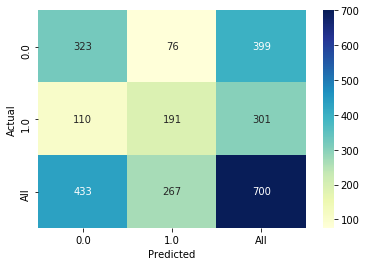

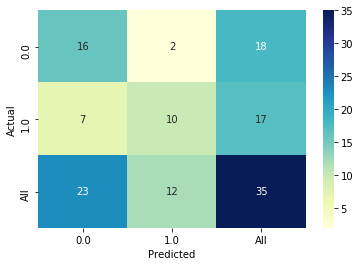

********************************
('xgboost', 'temporal')
Stride-based model performance:  0.6728571428571428 0.6153846153846154 0.6378737541528239 0.6264274061990213 0.7407139110234057
XGBClassifier(colsample_bytree=1.0, gamma=0.1, max_depth=8, min_child_weight=5,
              subsample=0.6)
Person-based model performance:  0.7714285714285715 0.8 0.7058823529411765 0.7500000000000001 0.8186274509803921


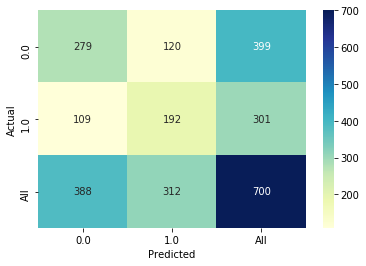

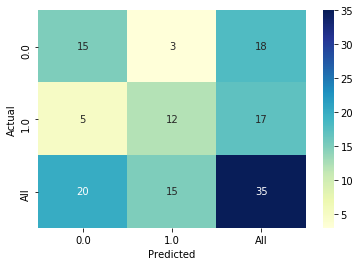

********************************
('xgboost', 'kinetic')
Stride-based model performance:  0.7114285714285714 0.7037037037037037 0.5681063122923588 0.6286764705882352 0.7774752495857584
XGBClassifier(colsample_bytree=1.0, gamma=1.5, max_depth=7, min_child_weight=5,
              subsample=0.6)
Person-based model performance:  0.7428571428571429 0.9 0.5294117647058824 0.6666666666666667 0.9493464052287582


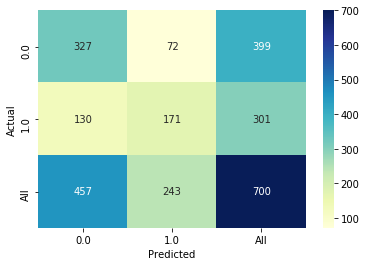

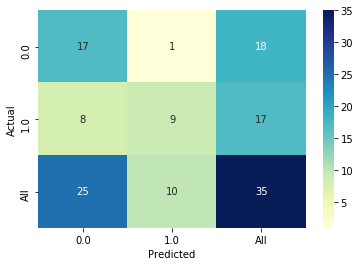

********************************
('xgboost', 'spatiotemporal')
Stride-based model performance:  0.7742857142857142 0.7562724014336918 0.7009966777408638 0.7275862068965518 0.862438488247196
XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=8, min_child_weight=5,
              subsample=0.8)
Person-based model performance:  0.8285714285714286 0.9230769230769231 0.7058823529411765 0.8000000000000002 0.8349673202614378


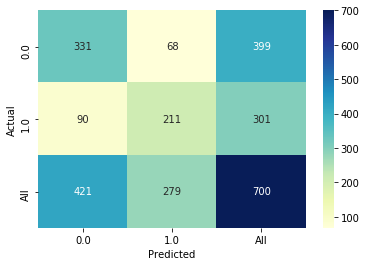

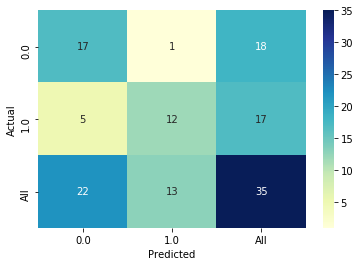

********************************
('xgboost', 'spatial_kinetic')
Stride-based model performance:  0.7957142857142857 0.8211382113821138 0.6710963455149501 0.7385740402193786 0.8760022981040642
XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=8, min_child_weight=5,
              subsample=0.8)
Person-based model performance:  0.7714285714285715 0.9090909090909091 0.5882352941176471 0.7142857142857143 0.9248366013071896


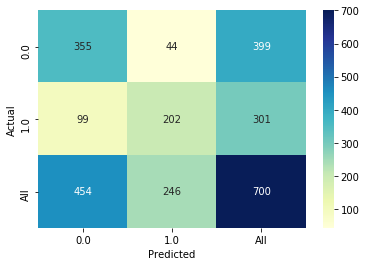

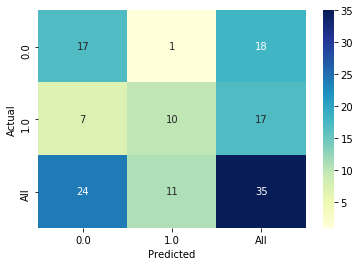

********************************
('xgboost', 'temporal_kinetic')
Stride-based model performance:  0.7385714285714285 0.7322834645669292 0.6179401993355482 0.6702702702702703 0.8243657316047595
XGBClassifier(colsample_bytree=0.8, gamma=1.5, max_depth=7, min_child_weight=5,
              subsample=0.6)
Person-based model performance:  0.7714285714285715 0.8461538461538461 0.6470588235294118 0.7333333333333334 0.9019607843137255


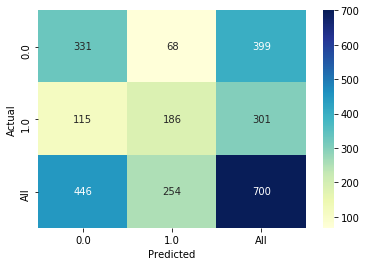

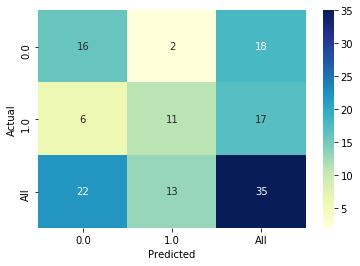

********************************
('knn', 'spatial')
Stride-based model performance:  0.7228571428571429 0.7219917012448133 0.5780730897009967 0.6420664206642066 0.8030707999233966
KNeighborsClassifier(n_neighbors=10, p=1)
Person-based model performance:  0.7142857142857143 0.8181818181818182 0.5294117647058824 0.6428571428571428 0.8643790849673203


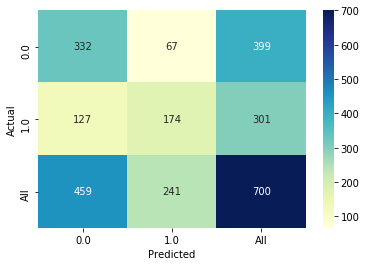

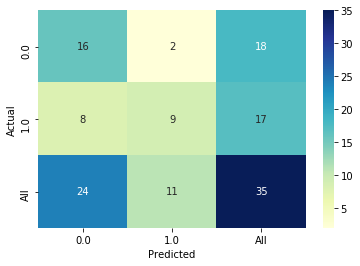

********************************
('knn', 'temporal')
Stride-based model performance:  0.6271428571428571 0.5943396226415094 0.4186046511627907 0.49122807017543857 0.6703927593069051
KNeighborsClassifier(n_neighbors=4, p=1)
Person-based model performance:  0.6857142857142857 0.875 0.4117647058823529 0.56 0.7892156862745098


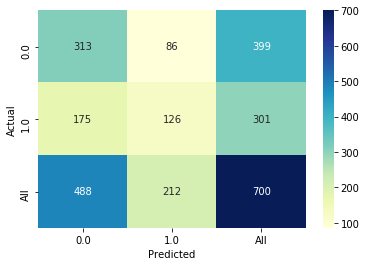

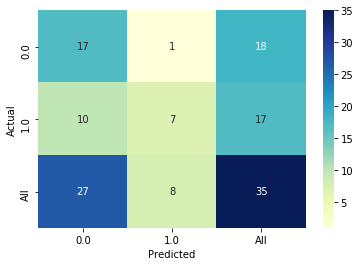

********************************
('knn', 'kinetic')
Stride-based model performance:  0.6214285714285714 0.59375 0.3787375415282392 0.46247464503042596 0.6533859565858167
KNeighborsClassifier(n_neighbors=10, p=5)
Person-based model performance:  0.6 0.8 0.23529411764705882 0.3636363636363636 0.7042483660130718


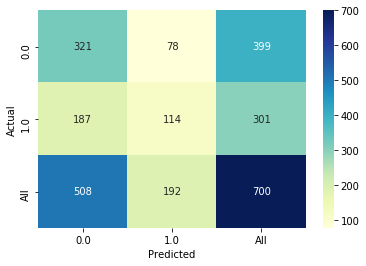

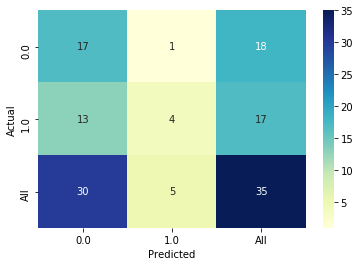

********************************
('knn', 'spatiotemporal')
Stride-based model performance:  0.6985714285714286 0.6859504132231405 0.5514950166112956 0.6114180478821363 0.7657973838250111
KNeighborsClassifier(n_neighbors=4, p=1)
Person-based model performance:  0.7714285714285715 0.8461538461538461 0.6470588235294118 0.7333333333333334 0.8006535947712419


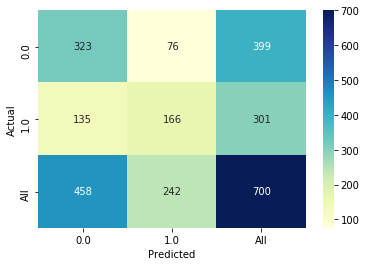

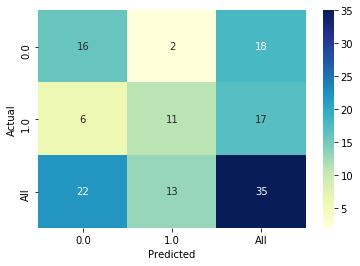

********************************
('knn', 'spatial_kinetic')
Stride-based model performance:  0.69 0.7019230769230769 0.4850498338870432 0.5736738703339882 0.760593343824678
KNeighborsClassifier(n_neighbors=10, p=5)
Person-based model performance:  0.6285714285714286 0.7 0.4117647058823529 0.5185185185185185 0.8022875816993464


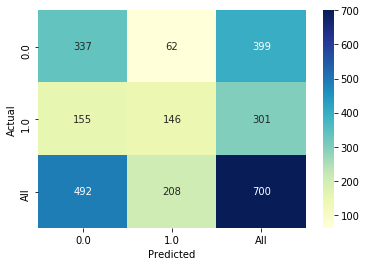

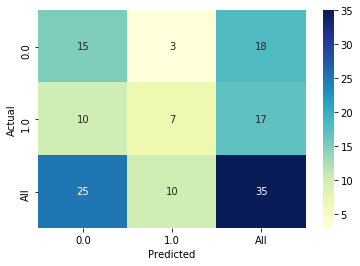

********************************
('knn', 'temporal_kinetic')
Stride-based model performance:  0.7214285714285714 0.7304347826086957 0.5581395348837209 0.632768361581921 0.7750397588656026
KNeighborsClassifier(n_neighbors=4, p=1)
Person-based model performance:  0.7714285714285715 1.0 0.5294117647058824 0.6923076923076924 0.8839869281045751


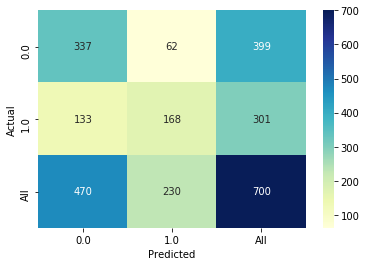

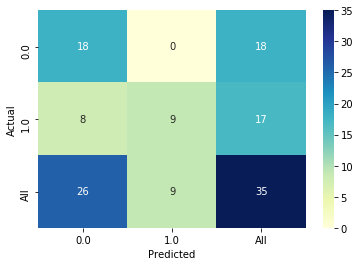

********************************
('decision_tree', 'spatial')
Stride-based model performance:  0.7185714285714285 0.6699346405228758 0.6810631229235881 0.6754530477759473 0.7284323766226196
DecisionTreeClassifier(min_samples_split=4, random_state=0)
Person-based model performance:  0.8 0.8125 0.7647058823529411 0.787878787878788 0.9068627450980392


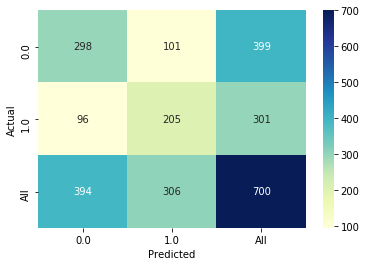

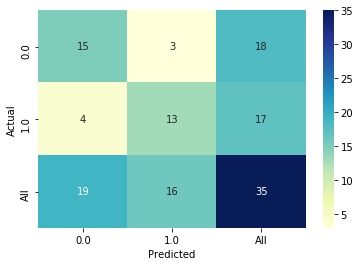

********************************
('decision_tree', 'temporal')
Stride-based model performance:  0.6171428571428571 0.5527156549520766 0.574750830564784 0.5635179153094463 0.6379362026328279
DecisionTreeClassifier(min_samples_split=7, random_state=0)
Person-based model performance:  0.7714285714285715 0.7647058823529411 0.7647058823529411 0.7647058823529412 0.8316993464052288


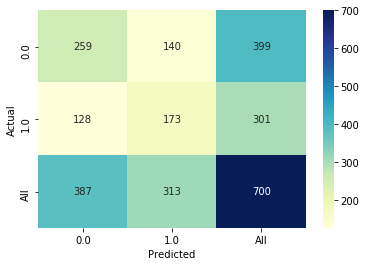

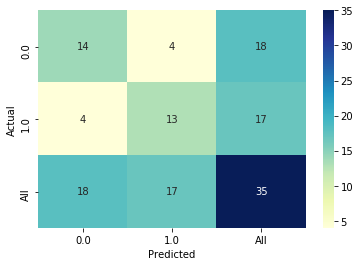

********************************
('decision_tree', 'kinetic')
Stride-based model performance:  0.6514285714285715 0.6028880866425993 0.5548172757475083 0.5778546712802767 0.6628364932264215
DecisionTreeClassifier(min_samples_split=47, random_state=0)
Person-based model performance:  0.7714285714285715 0.8461538461538461 0.6470588235294118 0.7333333333333334 0.8169934640522876


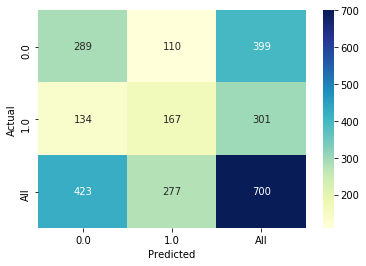

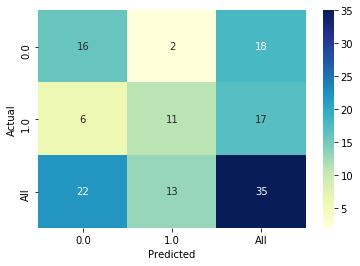

********************************
('decision_tree', 'spatiotemporal')
Stride-based model performance:  0.7285714285714285 0.7018181818181818 0.6411960132890365 0.670138888888889 0.7317338195988309
DecisionTreeClassifier(min_samples_split=14, random_state=0)
Person-based model performance:  0.8 0.9166666666666666 0.6470588235294118 0.7586206896551724 0.8366013071895425


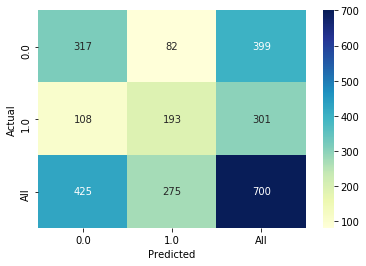

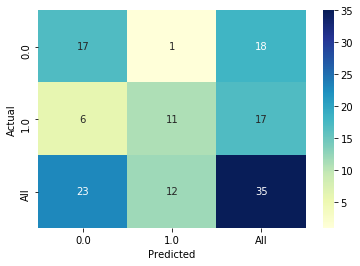

********************************
('decision_tree', 'spatial_kinetic')
Stride-based model performance:  0.6642857142857143 0.6213235294117647 0.5614617940199336 0.5898778359511344 0.7243982048143613
DecisionTreeClassifier(min_samples_split=42, random_state=0)
Person-based model performance:  0.6857142857142857 0.8 0.47058823529411764 0.5925925925925927 0.795751633986928


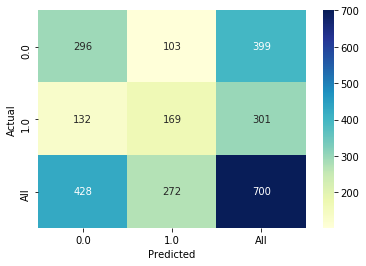

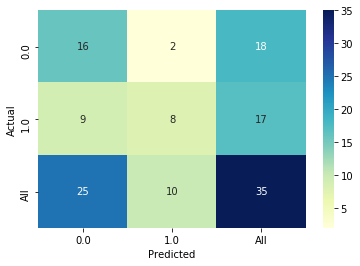

********************************
('decision_tree', 'temporal_kinetic')
Stride-based model performance:  0.69 0.6329113924050633 0.6644518272425249 0.6482982171799028 0.7682203848491661
DecisionTreeClassifier(min_samples_split=35, random_state=0)
Person-based model performance:  0.7142857142857143 0.7692307692307693 0.5882352941176471 0.6666666666666667 0.8022875816993464


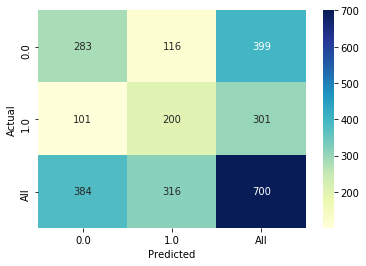

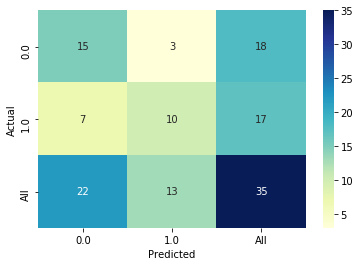

********************************
('linear_svm', 'spatial')
Stride-based model performance:  0.6071428571428571 0.5643564356435643 0.3787375415282392 0.4532803180914513 0.6366913962647482
LinearSVC(loss='hinge', random_state=0)
Person-based model performance:  0.6 0.6666666666666666 0.35294117647058826 0.46153846153846156 0.6862745098039216


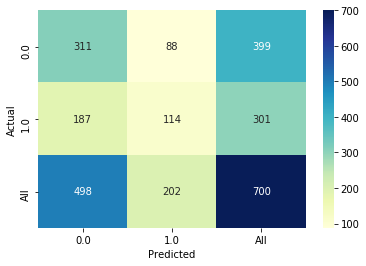

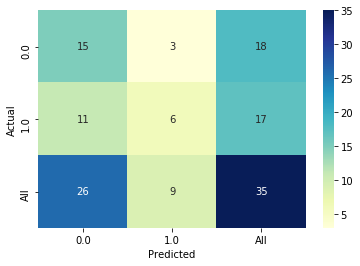

********************************
('linear_svm', 'temporal')
Stride-based model performance:  0.5828571428571429 0.5420560747663551 0.19269102990033224 0.28431372549019607 0.5175646758091241
LinearSVC(loss='hinge', random_state=0)
Person-based model performance:  0.6285714285714286 0.8333333333333334 0.29411764705882354 0.4347826086956522 0.5588235294117647


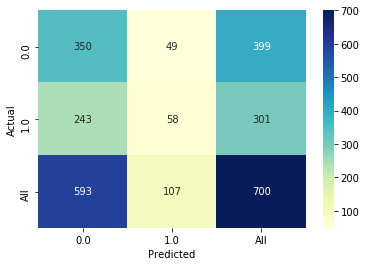

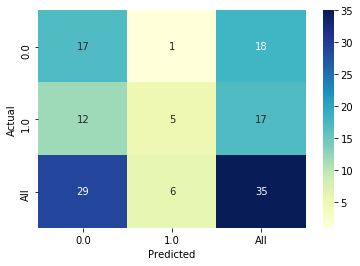

********************************
('linear_svm', 'kinetic')
Stride-based model performance:  0.6871428571428572 0.6846846846846847 0.5049833887043189 0.5812619502868069 0.7587407055845594
LinearSVC(random_state=0)
Person-based model performance:  0.6571428571428571 0.8571428571428571 0.35294117647058826 0.5 0.7222222222222223


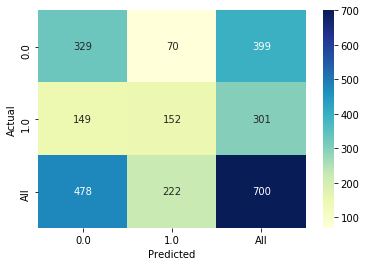

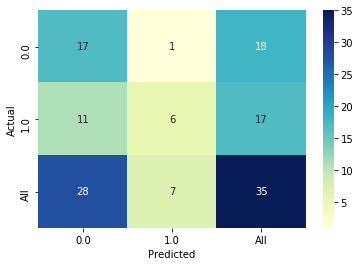

********************************
('linear_svm', 'spatiotemporal')
Stride-based model performance:  0.6314285714285715 0.6009389671361502 0.42524916943521596 0.4980544747081712 0.7136612294856743
LinearSVC(loss='hinge', random_state=0)
Person-based model performance:  0.6571428571428571 0.7272727272727273 0.47058823529411764 0.5714285714285714 0.7581699346405228


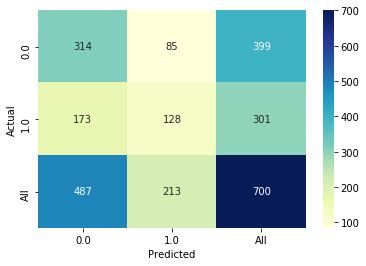

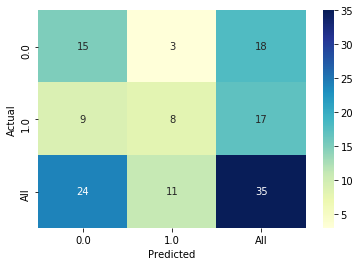

********************************
('linear_svm', 'spatial_kinetic')
Stride-based model performance:  0.7314285714285714 0.748898678414097 0.5647840531561462 0.643939393939394 0.7841530737141857
LinearSVC(random_state=0)
Person-based model performance:  0.6857142857142857 0.875 0.4117647058823529 0.56 0.7712418300653594


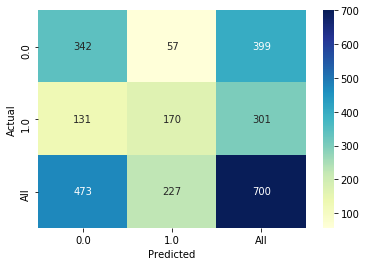

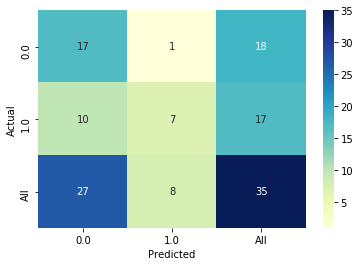

********************************
('linear_svm', 'temporal_kinetic')
Stride-based model performance:  0.71 0.7149122807017544 0.5415282392026578 0.6162570888468809 0.7655517531369953
LinearSVC(random_state=0)
Person-based model performance:  0.8 0.9166666666666666 0.6470588235294118 0.7586206896551724 0.8447712418300652


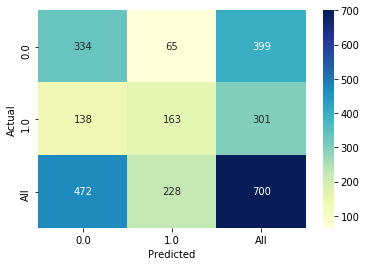

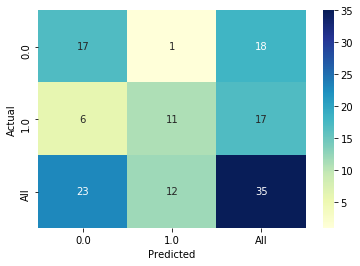

********************************
('logistic_regression', 'spatial')
Stride-based model performance:  0.5942857142857143 0.5414634146341464 0.3687707641196013 0.43873517786561267 0.6323366555924697
LogisticRegression(random_state=0)
Person-based model performance:  0.5714285714285714 0.6 0.35294117647058826 0.4444444444444445 0.65359477124183


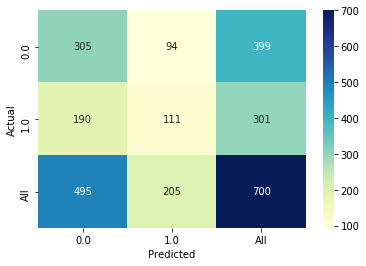

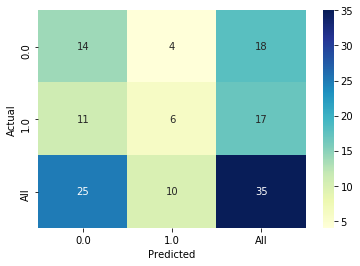

********************************
('logistic_regression', 'temporal')
Stride-based model performance:  0.5714285714285714 0.5034013605442177 0.24584717607973422 0.33035714285714285 0.5010866035520696
LogisticRegression(random_state=0)
Person-based model performance:  0.6285714285714286 0.75 0.35294117647058826 0.48 0.5686274509803921


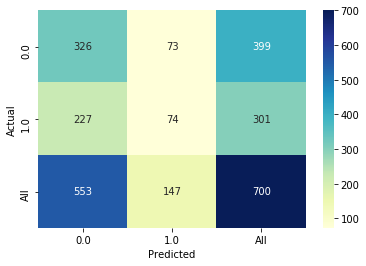

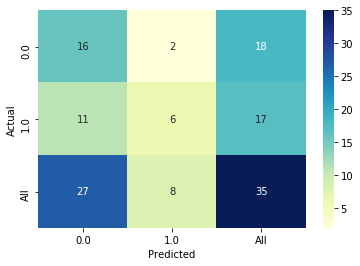

********************************
('logistic_regression', 'kinetic')
Stride-based model performance:  0.6785714285714286 0.6881188118811881 0.46179401993355484 0.5526838966202784 0.7482410344798873
LogisticRegression(random_state=0)
Person-based model performance:  0.6571428571428571 0.8571428571428571 0.35294117647058826 0.5 0.7058823529411765


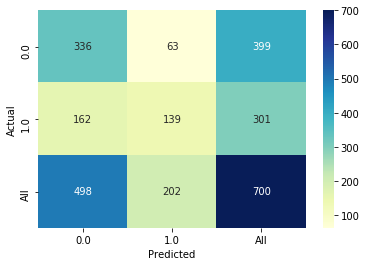

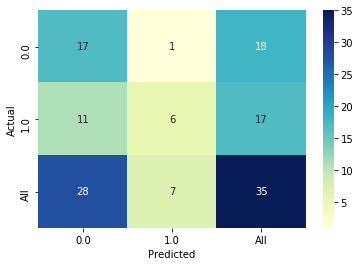

********************************
('logistic_regression', 'spatiotemporal')
Stride-based model performance:  0.62 0.5799086757990868 0.4219269102990033 0.48846153846153845 0.7085571070533477
LogisticRegression(random_state=0)
Person-based model performance:  0.6571428571428571 0.7272727272727273 0.47058823529411764 0.5714285714285714 0.7320261437908495


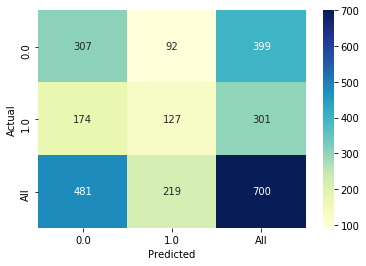

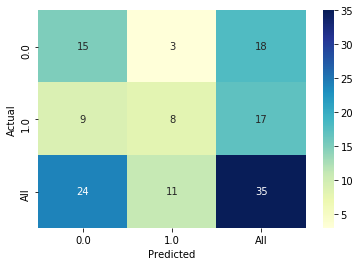

********************************
('logistic_regression', 'spatial_kinetic')
Stride-based model performance:  0.7342857142857143 0.7625570776255708 0.5548172757475083 0.6423076923076922 0.785077311218245
LogisticRegression(random_state=0)
Person-based model performance:  0.6857142857142857 0.875 0.4117647058823529 0.56 0.7483660130718954


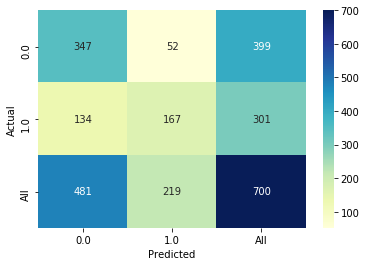

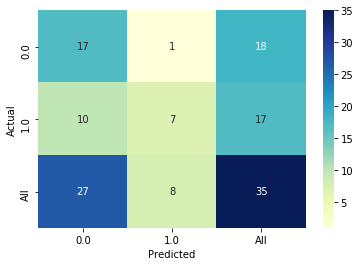

********************************
('logistic_regression', 'temporal_kinetic')
Stride-based model performance:  0.6871428571428572 0.6915887850467289 0.49169435215946844 0.5747572815533981 0.7373416931031898
LogisticRegression(random_state=0)
Person-based model performance:  0.7142857142857143 0.8181818181818182 0.5294117647058824 0.6428571428571428 0.8137254901960784


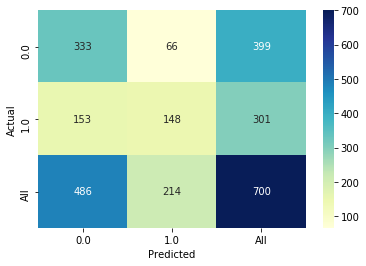

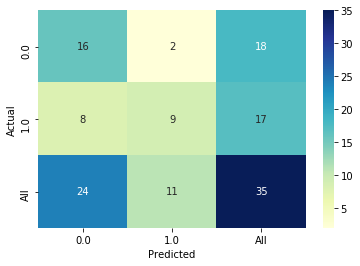

********************************
('mlp', 'spatial')
Stride-based model performance:  0.6728571428571428 0.6139240506329114 0.6445182724252492 0.6288492706645057 0.7190401252300187
MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 5, 20, 20, 100, 10, 10),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.6857142857142857 0.6666666666666666 0.7058823529411765 0.6857142857142857 0.8349673202614379


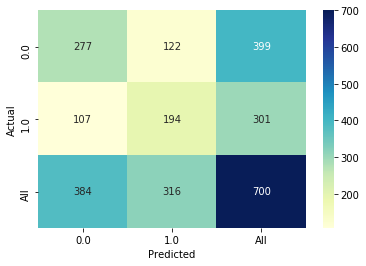

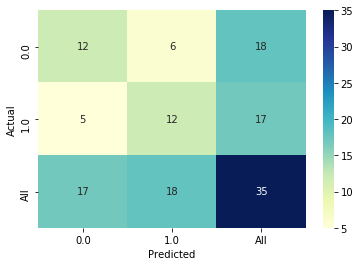

********************************
('mlp', 'temporal')
Stride-based model performance:  0.6814285714285714 0.7052631578947368 0.44518272425249167 0.5458248472505091 0.7291234731346639
MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50, 5, 50, 150, 150),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.7714285714285715 0.9090909090909091 0.5882352941176471 0.7142857142857143 0.803921568627451


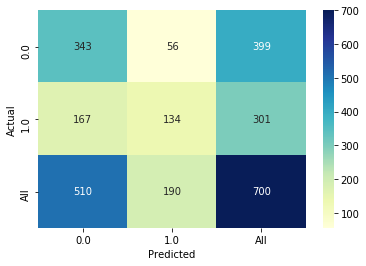

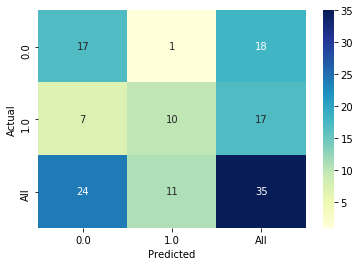

********************************
('mlp', 'kinetic')
Stride-based model performance:  0.6914285714285714 0.6440677966101694 0.6312292358803987 0.6375838926174496 0.7064796542852148
MLPClassifier(hidden_layer_sizes=(50, 50, 5, 30, 5, 5, 50, 10),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.7142857142857143 0.8181818181818182 0.5294117647058824 0.6428571428571428 0.7990196078431373


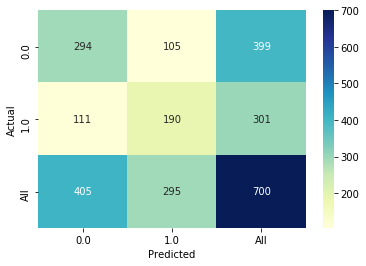

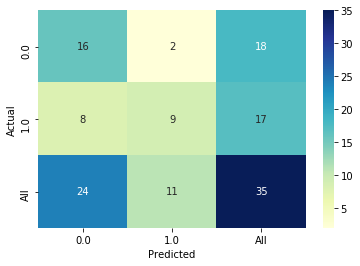

********************************
('mlp', 'spatiotemporal')
Stride-based model performance:  0.57 0.0 0.0 0.0 0.5
MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 5, 100, 50, 5, 50, 50),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.5142857142857142 0.0 0.0 0.0 0.5


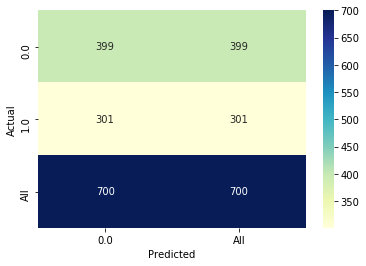

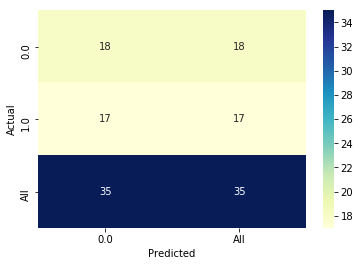

********************************
('mlp', 'spatial_kinetic')
Stride-based model performance:  0.7828571428571428 0.7475083056478405 0.7475083056478405 0.7475083056478405 0.8701154880556875
MLPClassifier(hidden_layer_sizes=(50, 100, 10, 5, 100, 25),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.7714285714285715 0.8 0.7058823529411765 0.7500000000000001 0.8856209150326797


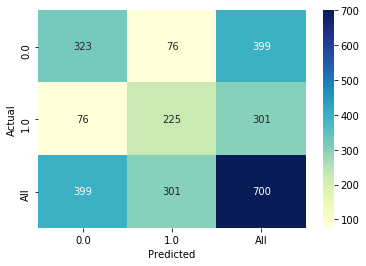

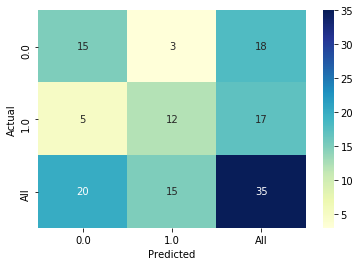

********************************
('mlp', 'temporal_kinetic')
Stride-based model performance:  0.57 0.0 0.0 0.0 0.5
MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5, 10, 100, 30, 30, 30, 10),
              learning_rate='adaptive', max_iter=500, random_state=0,
              shuffle=False)
Person-based model performance:  0.5142857142857142 0.0 0.0 0.0 0.5


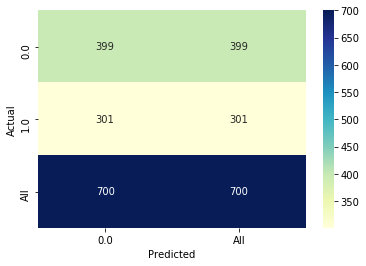

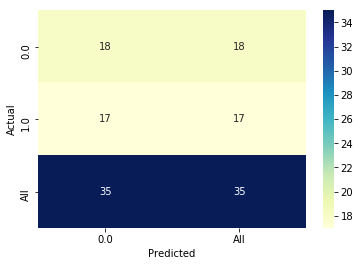

********************************


In [40]:
for col in ablation_columns:
    print (col)
    model = col[0]
    datastream = datastreams[col[1]]
#     print (regressN_trainX_norm[datastream].head())
    _, stride_person_metrics = models_task_generalize(trainX_regressN[datastream], trainY_regressN, testX_regressN[datastream], testY_regressN, model, data_type, results_dir, datastream_name = col[1]) 
    regressN_metrics[col] = stride_person_metrics
    print ('********************************')

regressN_metrics.index = ['stride_accuracy', 'stride_precision', 'stride_recall', 'stride_F1', 'stride_AUC', 'person_accuracy', 
                     'person_precision', 'person_recall', 'person_F1', 'person_AUC']  
regressN_metrics.to_csv(results_path_task_generalize_trad + results_dir + 'task_generalize_ablation_study_regressN.csv')

In [41]:
regressN_metrics

,"(random_forest, spatial)","(random_forest, temporal)","(random_forest, kinetic)","(random_forest, spatiotemporal)","(random_forest, spatial_kinetic)","(random_forest, temporal_kinetic)","(adaboost, spatial)","(adaboost, temporal)","(adaboost, kinetic)","(adaboost, spatiotemporal)",...,"(logistic_regression, kinetic)","(logistic_regression, spatiotemporal)","(logistic_regression, spatial_kinetic)","(logistic_regression, temporal_kinetic)","(mlp, spatial)","(mlp, temporal)","(mlp, kinetic)","(mlp, spatiotemporal)","(mlp, spatial_kinetic)","(mlp, temporal_kinetic)"
stride_accuracy,0.630000,0.674286,0.690000,0.634286,0.732857,0.767143,0.694286,0.641429,0.674286,0.421429,...,0.678571,0.620000,0.734286,0.687143,0.672857,0.681429,0.691429,0.570000,0.782857,0.570000
stride_precision,0.563636,0.618893,0.654412,0.571429,0.686275,0.755556,0.689956,0.631579,0.631769,0.357143,...,0.688119,0.579909,0.762557,0.691589,0.613924,0.705263,0.644068,0.000000,0.747508,0.000000
stride_recall,0.617940,0.631229,0.591362,0.598007,0.697674,0.677741,0.524917,0.398671,0.581395,0.431894,...,0.461794,0.421927,0.554817,0.491694,0.644518,0.445183,0.631229,0.000000,0.747508,0.000000
stride_F1,0.589540,0.625000,0.621291,0.584416,0.691928,0.714536,0.596226,0.488798,0.605536,0.390977,...,0.552684,0.488462,0.642308,0.574757,0.628849,0.545825,0.637584,0.000000,0.747508,0.000000
stride_AUC,0.690572,0.723665,0.787471,0.686280,0.801314,0.867180,0.724615,0.645892,0.714752,0.436615,...,0.748241,0.708557,0.785077,0.737342,0.719040,0.729123,0.706480,0.500000,0.870115,0.500000
person_accuracy,0.571429,0.800000,0.771429,0.657143,0.800000,0.885714,0.657143,0.742857,0.685714,0.400000,...,0.657143,0.657143,0.685714,0.714286,0.685714,0.771429,0.714286,0.514286,0.771429,0.514286
person_precision,0.562500,0.812500,0.846154,0.647059,0.857143,0.933333,0.777778,0.900000,0.800000,0.388889,...,0.857143,0.727273,0.875000,0.818182,0.666667,0.909091,0.818182,0.000000,0.800000,0.000000
person_recall,0.529412,0.764706,0.647059,0.647059,0.705882,0.823529,0.411765,0.529412,0.470588,0.411765,...,0.352941,0.470588,0.411765,0.529412,0.705882,0.588235,0.529412,0.000000,0.705882,0.000000
person_F1,0.545455,0.787879,0.733333,0.647059,0.774194,0.875000,0.538462,0.666667,0.592593,0.400000,...,0.500000,0.571429,0.560000,0.642857,0.685714,0.714286,0.642857,0.000000,0.750000,0.000000
person_AUC,0.651961,0.885621,0.816993,0.704248,0.831699,0.946078,0.763072,0.714052,0.857843,0.401961,...,0.705882,0.732026,0.748366,0.813725,0.834967,0.803922,0.799020,0.500000,0.885621,0.500000


### Reading the final metrics from the saved file

In [42]:
ablation_task_generalize = pd.read_csv(results_path_task_generalize_trad + results_dir + 'task_generalize_ablation_study_regressN.csv')
ablation_task_generalize.index = ablation_task_generalize['Unnamed: 0']
ablation_task_generalize.drop('Unnamed: 0', axis = 1, inplace = True)

ablation_task_generalize.columns = [literal_eval(ablation_task_generalize.loc['person_accuracy'].index[idx]) for idx in range(len(ablation_task_generalize.loc['person_accuracy'].index))]

In [43]:
ablation_task_generalize

,"(random_forest, spatial)","(random_forest, temporal)","(random_forest, kinetic)","(random_forest, spatiotemporal)","(random_forest, spatial_kinetic)","(random_forest, temporal_kinetic)","(adaboost, spatial)","(adaboost, temporal)","(adaboost, kinetic)","(adaboost, spatiotemporal)",...,"(logistic_regression, kinetic)","(logistic_regression, spatiotemporal)","(logistic_regression, spatial_kinetic)","(logistic_regression, temporal_kinetic)","(mlp, spatial)","(mlp, temporal)","(mlp, kinetic)","(mlp, spatiotemporal)","(mlp, spatial_kinetic)","(mlp, temporal_kinetic)"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
stride_accuracy,0.630000,0.674286,0.690000,0.634286,0.732857,0.767143,0.694286,0.641429,0.674286,0.421429,...,0.678571,0.620000,0.734286,0.687143,0.672857,0.681429,0.691429,0.570000,0.782857,0.570000
stride_precision,0.563636,0.618893,0.654412,0.571429,0.686275,0.755556,0.689956,0.631579,0.631769,0.357143,...,0.688119,0.579909,0.762557,0.691589,0.613924,0.705263,0.644068,0.000000,0.747508,0.000000
stride_recall,0.617940,0.631229,0.591362,0.598007,0.697674,0.677741,0.524917,0.398671,0.581395,0.431894,...,0.461794,0.421927,0.554817,0.491694,0.644518,0.445183,0.631229,0.000000,0.747508,0.000000
stride_F1,0.589540,0.625000,0.621291,0.584416,0.691928,0.714536,0.596226,0.488798,0.605536,0.390977,...,0.552684,0.488462,0.642308,0.574757,0.628849,0.545825,0.637584,0.000000,0.747508,0.000000
stride_AUC,0.690572,0.723665,0.787471,0.686280,0.801314,0.867180,0.724615,0.645892,0.714752,0.436615,...,0.748241,0.708557,0.785077,0.737342,0.719040,0.729123,0.706480,0.500000,0.870115,0.500000
person_accuracy,0.571429,0.800000,0.771429,0.657143,0.800000,0.885714,0.657143,0.742857,0.685714,0.400000,...,0.657143,0.657143,0.685714,0.714286,0.685714,0.771429,0.714286,0.514286,0.771429,0.514286
person_precision,0.562500,0.812500,0.846154,0.647059,0.857143,0.933333,0.777778,0.900000,0.800000,0.388889,...,0.857143,0.727273,0.875000,0.818182,0.666667,0.909091,0.818182,0.000000,0.800000,0.000000
person_recall,0.529412,0.764706,0.647059,0.647059,0.705882,0.823529,0.411765,0.529412,0.470588,0.411765,...,0.352941,0.470588,0.411765,0.529412,0.705882,0.588235,0.529412,0.000000,0.705882,0.000000
person_F1,0.545455,0.787879,0.733333,0.647059,0.774194,0.875000,0.538462,0.666667,0.592593,0.400000,...,0.500000,0.571429,0.560000,0.642857,0.685714,0.714286,0.642857,0.000000,0.750000,0.000000


### Heatmap for person-accuracy for all datastreams and algorithms for task generalization W->WT

In [50]:
person_accuracy_task_generlaize = pd.DataFrame(columns = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp'], index = list(datastreams.keys()))

for idx in range(len(ablation_task_generalize.columns)):
    x = ablation_task_generalize.loc['person_accuracy'].index[idx][1]
    y = ablation_task_generalize.loc['person_accuracy'].index[idx][0]
#     print (regressN_metrics.loc['person_accuracy'][(y, x)])
    person_accuracy_task_generlaize.loc[x, y] = ablation_task_generalize.loc['person_accuracy'][(y, x)]

person_accuracy_task_generlaize.drop(['knn'], axis = 1, inplace= True)
person_accuracy_task_generlaize = person_accuracy_task_generlaize.astype(float)

In [51]:
person_accuracy_task_generlaize

,random_forest,adaboost,kernel_svm,gbm,xgboost,decision_tree,linear_svm,logistic_regression,mlp
spatial,0.571429,0.657143,0.571429,0.600000,0.742857,0.800000,0.600000,0.571429,0.685714
temporal,0.800000,0.742857,0.628571,0.714286,0.771429,0.771429,0.628571,0.628571,0.771429
kinetic,0.771429,0.685714,0.514286,0.714286,0.742857,0.771429,0.657143,0.657143,0.714286
spatiotemporal,0.657143,0.400000,0.514286,0.800000,0.828571,0.800000,0.657143,0.657143,0.514286
spatial_kinetic,0.800000,0.685714,0.857143,0.742857,0.771429,0.685714,0.685714,0.685714,0.771429
temporal_kinetic,0.885714,0.714286,0.657143,0.828571,0.771429,0.714286,0.800000,0.714286,0.514286


In [52]:
#Adding the person mean accuracy for all the models using all the features 
person_accuracy_task_generlaize.loc['All features'] = [np.nan]*9

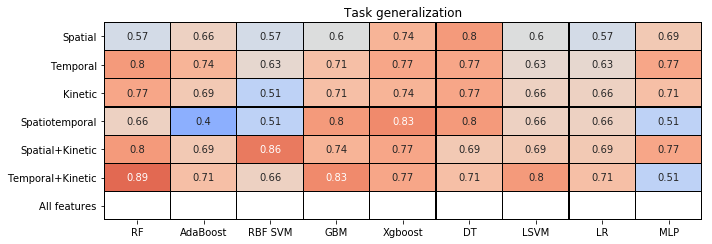

In [53]:
ml_model_names1 = ['RF','AdaBoost', 'RBF SVM', 'GBM','Xgboost', 'DT',  'LSVM', 'LR', 'MLP']
datasets = ['Spatial', 'Temporal', 'Kinetic', 'Spatiotemporal', 'Spatial+Kinetic', \
       'Temporal+Kinetic', 'All features']

fig, axes = plt.subplots(1, 1, figsize=(10, 3.5))
sns.heatmap(person_accuracy_task_generlaize, vmin=0.3, vmax=1.0, center = 0.6, cmap="coolwarm", annot=True, linewidths=0.4, linecolor="k", \
            cbar = False, xticklabels=ml_model_names1,  yticklabels=datasets)
plt.title('Task generalization')
plt.tight_layout()
plt.savefig(results_path_task_generalize_trad + results_dir + 'task_generalize_ablation_study_'+ data_type +'_heatmap.jpg', dpi = 250)
plt.show()